In [169]:
from time import sleep

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.text import Annotation

from random import randint
from sklearn.datasets import make_classification

In [170]:
n_samples = 64
n_features = 2
n_informative = 2
n_redundant = 0
n_clusters_per_class = 1
class_sep = 2
random_state = randint(0, 10000)

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_clusters_per_class=n_clusters_per_class,
    class_sep=class_sep,
    random_state=random_state
)

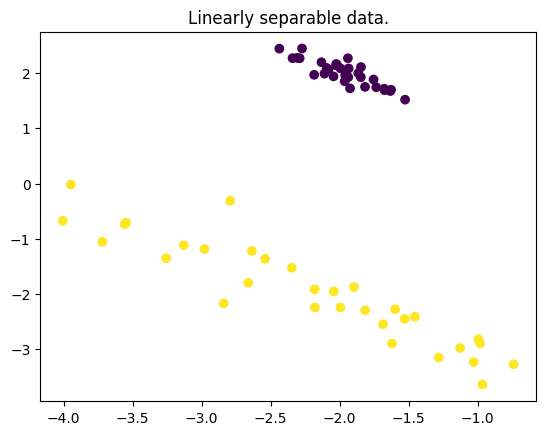

In [171]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Linearly separable data.')
plt.show()

In [172]:
weights = np.ones((X.shape[1] + 1, 1))

In [173]:
weights

array([[1.],
       [1.],
       [1.]])

In [174]:
x_bias = np.hstack((np.ones((X.shape[0], 1)), X))

In [175]:
weights

array([[1.],
       [1.],
       [1.]])

In [176]:
x_bias

array([[ 1.        , -1.89658745, -1.87497775],
       [ 1.        , -1.94050178,  2.26892752],
       [ 1.        , -2.30828072,  2.27432888],
       [ 1.        , -1.62103522, -2.89742372],
       [ 1.        , -3.71930002, -1.0548383 ],
       [ 1.        , -1.28189304, -3.15045724],
       [ 1.        , -3.25791047, -1.35179287],
       [ 1.        , -2.43711283,  2.44148857],
       [ 1.        , -1.52842446, -2.45071371],
       [ 1.        , -2.18128022, -1.91461599],
       [ 1.        , -2.66218162, -1.79668934],
       [ 1.        , -2.04464403,  1.93962323],
       [ 1.        , -2.11025079,  1.98854235],
       [ 1.        , -1.92492454,  1.72282885],
       [ 1.        , -1.02916819, -3.23138722],
       [ 1.        , -2.18008501, -2.24344754],
       [ 1.        , -4.00603831, -0.67485656],
       [ 1.        , -1.63301801,  1.67441417],
       [ 1.        , -2.2725519 ,  2.44458672],
       [ 1.        , -2.84009188, -2.17142411],
       [ 1.        , -1.93506766,  2.082

In [177]:
x_bias[y.T==0] = -x_bias[y.T==0]

In [178]:
x_bias

array([[ 1.        , -1.89658745, -1.87497775],
       [-1.        ,  1.94050178, -2.26892752],
       [-1.        ,  2.30828072, -2.27432888],
       [ 1.        , -1.62103522, -2.89742372],
       [ 1.        , -3.71930002, -1.0548383 ],
       [ 1.        , -1.28189304, -3.15045724],
       [ 1.        , -3.25791047, -1.35179287],
       [-1.        ,  2.43711283, -2.44148857],
       [ 1.        , -1.52842446, -2.45071371],
       [ 1.        , -2.18128022, -1.91461599],
       [ 1.        , -2.66218162, -1.79668934],
       [-1.        ,  2.04464403, -1.93962323],
       [-1.        ,  2.11025079, -1.98854235],
       [-1.        ,  1.92492454, -1.72282885],
       [ 1.        , -1.02916819, -3.23138722],
       [ 1.        , -2.18008501, -2.24344754],
       [ 1.        , -4.00603831, -0.67485656],
       [-1.        ,  1.63301801, -1.67441417],
       [-1.        ,  2.2725519 , -2.44458672],
       [ 1.        , -2.84009188, -2.17142411],
       [-1.        ,  1.93506766, -2.082

In [179]:
learning_rate = .002
duration = 180
sleep_time = .5

In [180]:
weights

array([[1.],
       [1.],
       [1.]])

In [181]:
np.where(x_bias@weights>0, 1, -1)

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1]])

In [182]:
# vectorized mapping for checking if classification was ok

class_validity_map_template = {
    1: 0,
    -1: 1
}
vectorized_map = np.vectorize(class_validity_map_template.get)

In [183]:
y.size

64

In [184]:
# find elements that are not correctly classified
_wrong_classification = (vectorized_map(np.where(x_bias@weights>0, 1, -1)) != y.reshape(y.size, 1))

# to pass this index correctly use:
x_bias[_wrong_classification[:, 0]]

array([[-1.        ,  1.94050178, -2.26892752],
       [-1.        ,  2.30828072, -2.27432888],
       [-1.        ,  2.43711283, -2.44148857],
       [-1.        ,  2.04464403, -1.93962323],
       [-1.        ,  2.11025079, -1.98854235],
       [-1.        ,  1.92492454, -1.72282885],
       [-1.        ,  1.63301801, -1.67441417],
       [-1.        ,  2.2725519 , -2.44458672],
       [-1.        ,  1.93506766, -2.08286314],
       [-1.        ,  1.8465792 , -1.92457114],
       [-1.        ,  1.93787271, -1.92482477],
       [-1.        ,  1.96368991, -1.85045045],
       [-1.        ,  1.84569976, -2.10797807],
       [-1.        ,  2.09495573, -2.09295923],
       [-1.        ,  1.67487378, -1.68990328],
       [-1.        ,  1.67671336, -1.71609975],
       [-1.        ,  2.13224432, -2.19596061],
       [-1.        ,  2.28997136, -2.26809089],
       [-1.        ,  1.62784794, -1.69800743],
       [-1.        ,  2.080644  , -2.06495344],
       [-1.        ,  2.34155913, -2.269

In [185]:
x_bias[_wrong_classification[:, 0]]

array([[-1.        ,  1.94050178, -2.26892752],
       [-1.        ,  2.30828072, -2.27432888],
       [-1.        ,  2.43711283, -2.44148857],
       [-1.        ,  2.04464403, -1.93962323],
       [-1.        ,  2.11025079, -1.98854235],
       [-1.        ,  1.92492454, -1.72282885],
       [-1.        ,  1.63301801, -1.67441417],
       [-1.        ,  2.2725519 , -2.44458672],
       [-1.        ,  1.93506766, -2.08286314],
       [-1.        ,  1.8465792 , -1.92457114],
       [-1.        ,  1.93787271, -1.92482477],
       [-1.        ,  1.96368991, -1.85045045],
       [-1.        ,  1.84569976, -2.10797807],
       [-1.        ,  2.09495573, -2.09295923],
       [-1.        ,  1.67487378, -1.68990328],
       [-1.        ,  1.67671336, -1.71609975],
       [-1.        ,  2.13224432, -2.19596061],
       [-1.        ,  2.28997136, -2.26809089],
       [-1.        ,  1.62784794, -1.69800743],
       [-1.        ,  2.080644  , -2.06495344],
       [-1.        ,  2.34155913, -2.269

# Step by step learning


## initial boundary

In [186]:
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = - (weights[0] + weights[1] * x1_vals) / weights[2]
step = 0

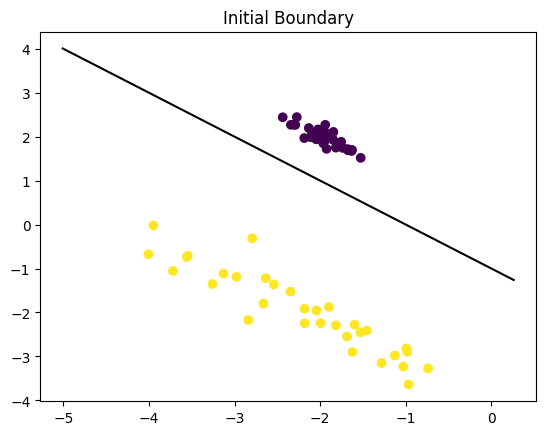

In [187]:
plt.scatter(X[:,0], X[:,1], c=y)
# plt.scatter(X[:,0], x_bias@weights, c='r')
plt.plot(x1_vals, x2_vals, 'k-')
# plt.plot([min(X[:,0]), max(X[:,0])], [0, 0], 'g--')
# plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
# plt.grid(True)
plt.title('Initial Boundary')
plt.show()

In [188]:
x_bias @ weights

array([[-2.7715652 ],
       [-1.32842574],
       [-0.96604815],
       [-3.51845894],
       [-3.77413832],
       [-3.43235029],
       [-3.60970334],
       [-1.00437573],
       [-2.97913817],
       [-3.09589621],
       [-3.45887096],
       [-0.89497919],
       [-0.87829156],
       [-0.79790432],
       [-3.26055541],
       [-3.42353255],
       [-3.68089488],
       [-1.04139616],
       [-1.17203482],
       [-4.01151599],
       [-1.14779548],
       [-2.96661894],
       [-1.07799194],
       [-3.01208702],
       [-0.98695206],
       [-0.88676054],
       [-2.87255324],
       [-3.29411666],
       [-1.2622783 ],
       [-0.9980035 ],
       [-1.0150295 ],
       [-1.03938639],
       [-1.06371629],
       [-0.97811953],
       [-1.07015949],
       [-0.98430944],
       [-0.92780319],
       [-1.00777314],
       [-2.9959734 ],
       [-2.90322634],
       [-3.1654751 ],
       [-3.23304151],
       [-2.86608784],
       [-1.08949309],
       [-0.99154356],
       [-1

# step by step learning

In [189]:
from matplotlib.animation import FuncAnimation

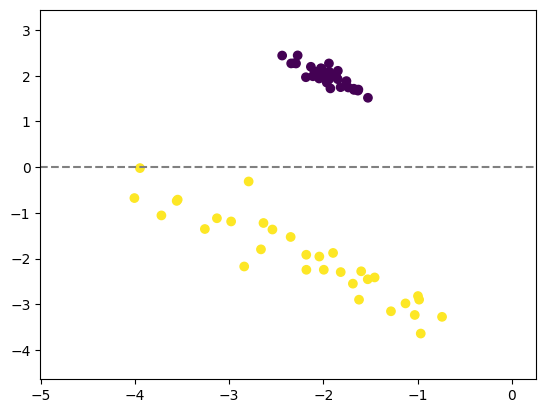

In [190]:
# Assuming X, y, x1_vals, learning_term, weights, x_bias, and other necessary variables are defined above
learning_term = learning_rate / 2
# Create a figure and axis for the plot
fig, ax = plt.subplots()
# Set plot limits
ax.set_ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
ax.set_xlim(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
# horizontal 0 boundary
ax.axhline(0, color='gray', linestyle='--')

# Initialize a line plot for the boundary. We'll update this in the animation.
line, = ax.plot([], [], 'k-')
# Scatter plot for the data points
scatter = ax.scatter(X[:,0], X[:,1], c=y)

# Placeholder for the scatter plot of x_bias @ weights
scatter_bias_weights, = ax.plot([], [], 'ro', label='x_bias @ weights')

# Initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    scatter_bias_weights.set_data([], [])
    return line, scatter_bias_weights

# Animation update function: this is called sequentially
def update(step):
    global weights  # Ensure we modify the global weights variable
    hard_limiter = np.where(x_bias @ weights > 0, 1, 0)
    errors = (1 - hard_limiter)
    update_term = learning_term * errors
    weights = weights + x_bias.T @ update_term
    x2_vals = - (weights[0] + weights[1] * x1_vals) / weights[2]
    line.set_data(x1_vals, x2_vals)
    
    # Calculate x_bias @ weights for each point and update the scatter plot
    bias_weights_values = x_bias @ weights
    scatter_bias_weights.set_data(X[:, 0], bias_weights_values)
    
    ax.set_title(f'Boundary, step={step}')
    return line, scatter_bias_weights

# Create animation
ani = FuncAnimation(fig, update, frames=range(duration), init_func=init, blit=True)
# To display the animation in a Jupyter notebook
# from IPython.display import HTML
# HTML(ani.to_jshtml())

In [191]:
from IPython.display import HTML
HTML(ani.to_jshtml())

In [129]:
learning_term = learning_rate/2
for _ in range(duration):
    hard_limiter = np.where(x_bias @ weights>0, 1, 0)
    errors = (1 - hard_limiter)
    update_term = learning_term * errors
    weights = weights + x_bias.T @ update_term

In [130]:
weights

array([[ 0.76      ],
       [-0.85991857],
       [ 0.1680503 ]])

# plot

In [131]:
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = - (weights[0] + weights[1] * x1_vals) / weights[2]

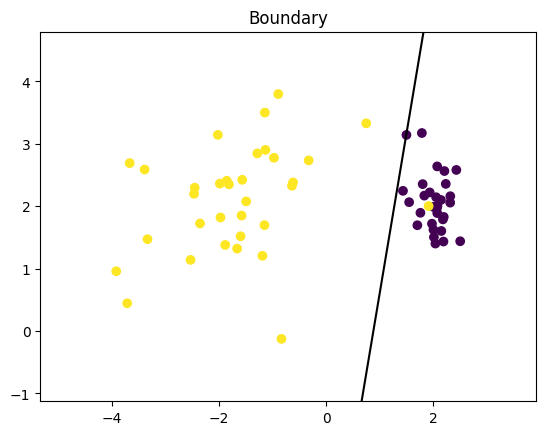

In [132]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1_vals, x2_vals, 'k-')
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.title('Boundary')
plt.show()